In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [ ]:
#importing the dataset from excel
df = pd.read_csv('Engineering_graduate_salary.csv')

In [ ]:
#rows and columns are present
df.shape


(2998, 34)

In [ ]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,22-10-1990,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,15-05-1990,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,21-08-1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,04-05-1991,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,30-10-1990,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [ ]:
df.tail()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
2993,103174,f,17-04-1989,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,22-07-1991,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,24-11-1988,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,25-08-1988,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000
2997,993701,m,27-05-1992,77.00,state board,2009,75.50,state board,1111,2,...,-1,-1,-1,-1,-0.5899,-1.9521,0.3174,1.16010,-2.3937,200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [ ]:
# check for null values
pd.isnull(df).sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [ ]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [ ]:
# dropping features which do not make any sense to predict salary
df.drop(['ID', '10board','12graduation','12board' ,'CollegeID' ,'DOB','CollegeCityID','CollegeCityTier'], axis = 1, inplace = True)


In [ ]:
df.head(20)

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,2013,650,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,2014,440,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,Maharashtra,2011,485,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,Delhi,2013,675,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,Tamil Nadu,2012,575,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
5,f,83.16,77.00,1,M.Tech./M.E.,instrumentation and control engineering,99.93,Punjab,2013,535,...,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000
6,f,72.50,53.20,2,B.Tech/B.E.,mechanical engineering,68.00,West Bengal,2013,510,...,469,-1,-1,-1,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000
7,f,77.00,88.00,2,B.Tech/B.E.,computer science & engineering,71.00,Telangana,2013,370,...,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.90660,-0.2859,105000
8,m,76.80,87.70,2,B.Tech/B.E.,information technology,73.15,Andhra Pradesh,2014,510,...,-1,-1,-1,-1,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000
9,f,57.00,73.00,2,B.Tech/B.E.,computer science & engineering,70.08,Uttar Pradesh,2014,500,...,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000


# EDA


In [ ]:
data = df.corr().fillna(0)
data.round(-1)

<ipython-input-12-9b97a7ca7fa9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr().fillna(0)


,10percentage,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
10percentage,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
12percentage,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
CollegeTier,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
collegeGPA,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
GraduationYear,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
English,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
Logical,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
Quant,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
Domain,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
ComputerProgramming,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0


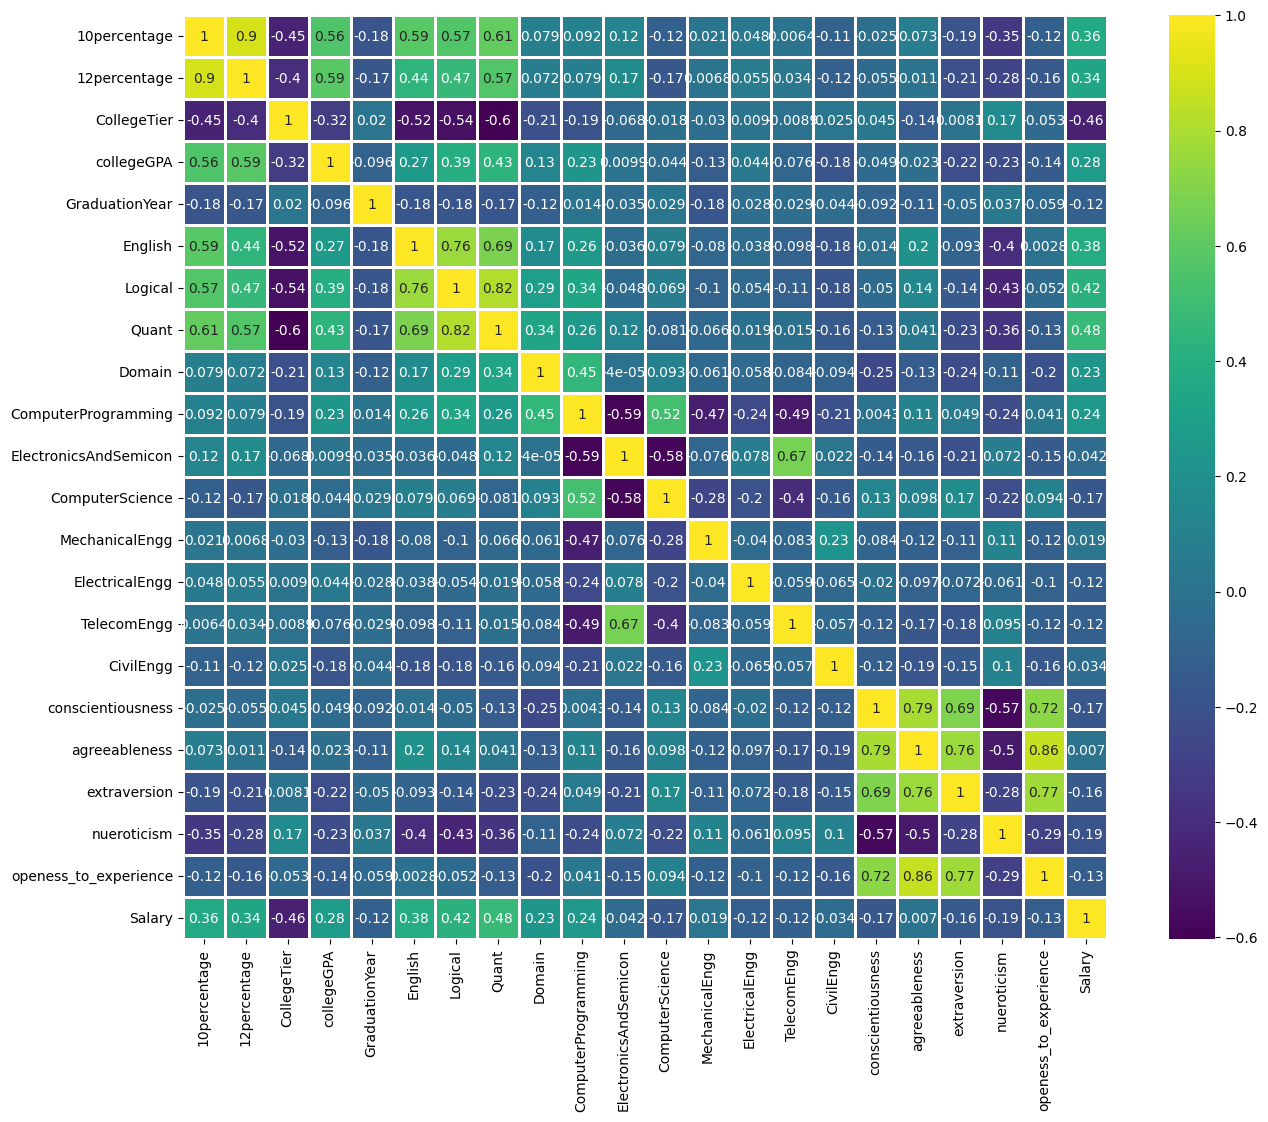

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap='viridis',square= True, linewidth = 1 )
plt.show()

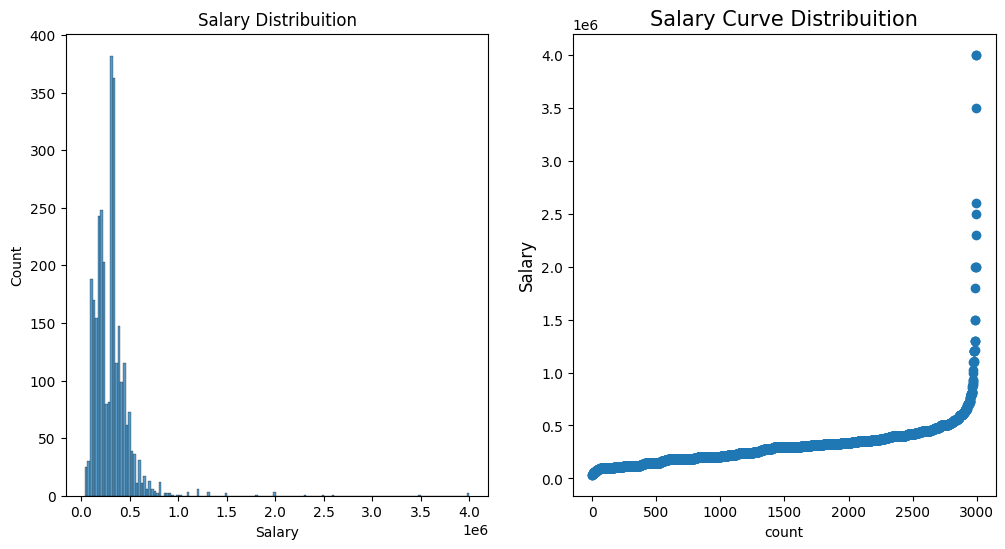

In [ ]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.histplot(df['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("count")
g1 = plt.ylabel("Salary", fontsize=12)
plt.show()

Most of the graduates having salaries under 10 lakhs.
Long tail of distribution is longer on right hand side as compared to left hand side which shows that distribution is positively skewed

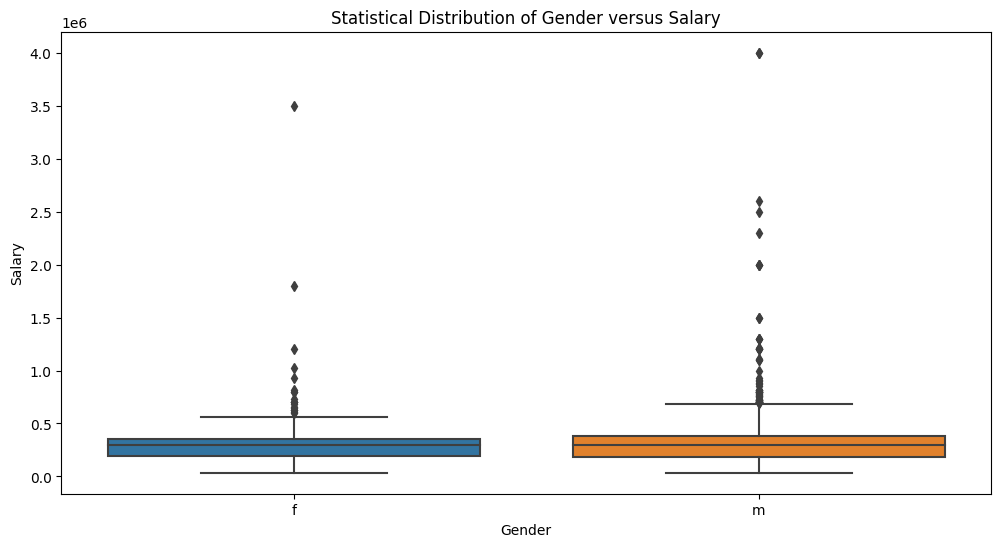

In [ ]:
#analysis of salary and gender
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Gender'], y=df['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

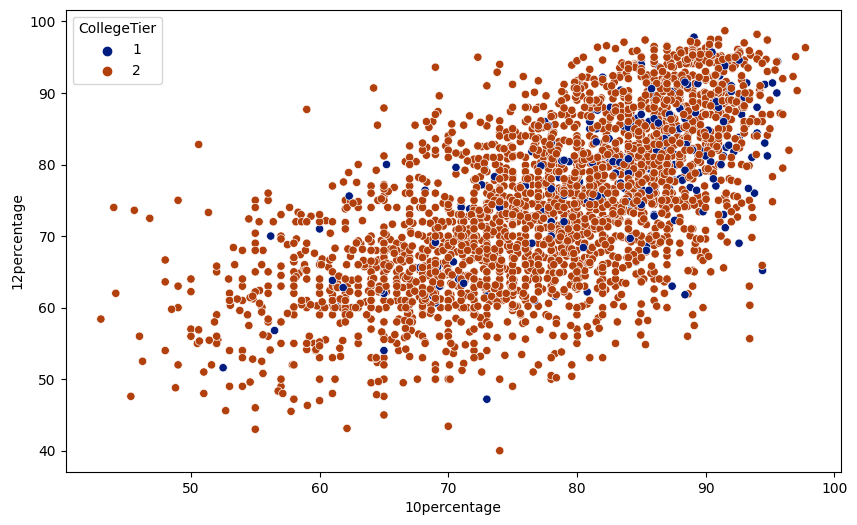

In [ ]:
#analysis of 10th and 12th percentage by college tier
plt.figure(figsize=(10,6))
sns.scatterplot(x = '10percentage', y = '12percentage', hue='CollegeTier',palette='dark', data = df)
plt.show()

According to correlation plot and scatterplot, we can see that 10th and 12th are positively correlated.


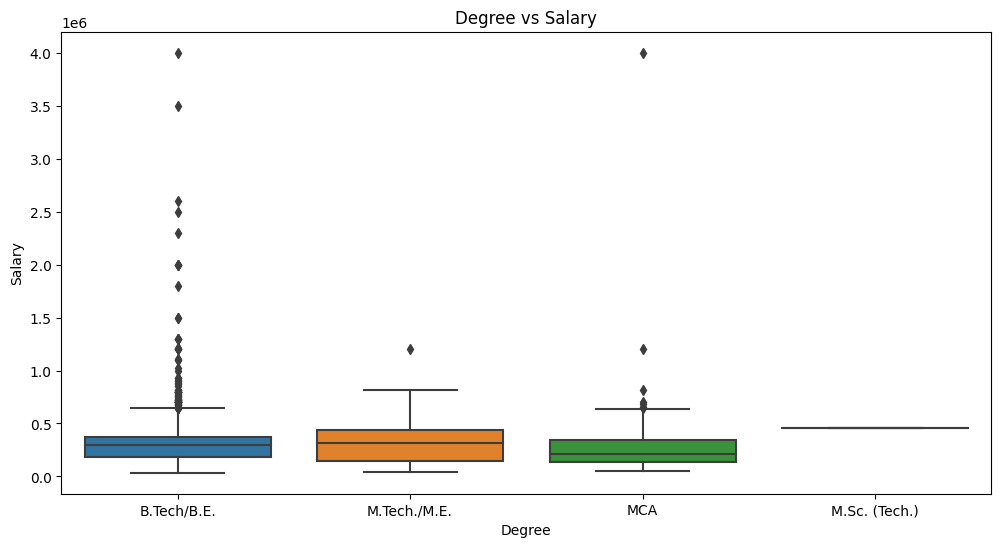

In [ ]:
# analysis of salary and degree
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Degree'], y=df['Salary'] )

plt.title('Degree vs Salary')
plt.show()

In [ ]:
df['Degree'].value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

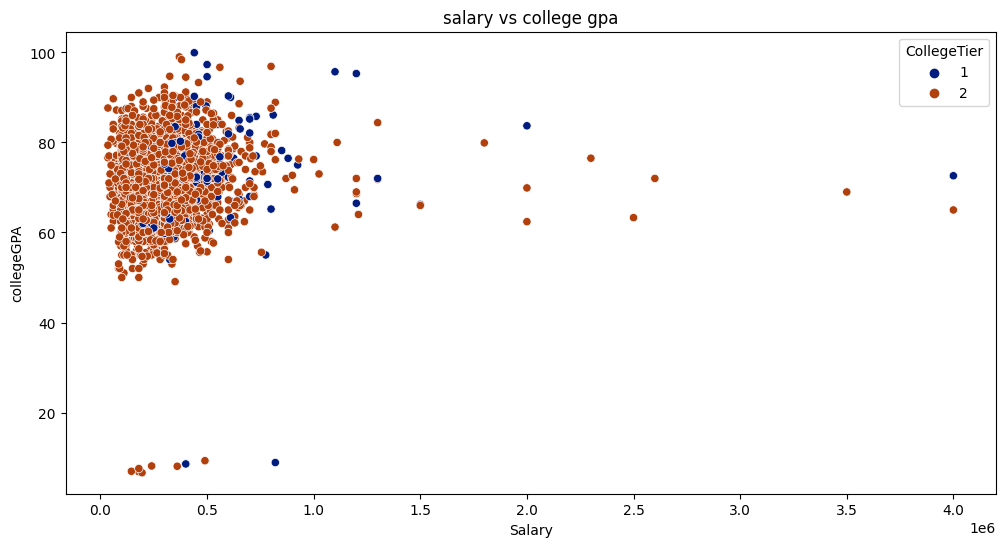

In [ ]:
#analysis of salary and college gpa
plt.figure(figsize = (12, 6))
sns.scatterplot(x ='Salary', y = 'collegeGPA',hue='CollegeTier',data=df,palette = 'dark')
plt.title('salary vs college gpa')
plt.show()

In [ ]:
#droping the outliers
df = df.loc[(df['collegeGPA'] > 40) & (df['Salary'] < 1500000)]

In [ ]:
df.shape

(2977, 26)

In [ ]:
#Analysis of Salary & specialization


# checking the count of unique specialization present in dataframe
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 553
information technology                         502
computer engineering                           409
computer application                           200
mechanical engineering                         152
electronics and electrical engineering         147
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               23
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         12
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

DUMMY VARIABLE ENCODING

In [ ]:
dummy_data = pd.get_dummies(df.Gender,drop_first = True)
dummy_data.head(10)

,m
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [ ]:
dummy_data_degree = pd.get_dummies(df.Degree, drop_first = True)
dummy_data_degree.head(10)

,M.Sc. (Tech.),M.Tech./M.E.,MCA
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [ ]:
dummy_data_Specialization = pd.get_dummies(df.Specialization,drop_first = True)
dummy_data_Specialization.head(10)

,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,computer engineering,...,information technology,instrumentation and control engineering,instrumentation engineering,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,telecommunication engineering
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = pd.concat([df,dummy_data,dummy_data_degree,dummy_data_Specialization] , axis = "columns")
data

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,...,information technology,instrumentation and control engineering,instrumentation engineering,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,telecommunication engineering
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,2013,650,...,0,1,0,0,0,0,0,0,0,0
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,2014,440,...,0,0,0,0,0,0,0,0,0,0
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,Maharashtra,2011,485,...,0,0,0,0,0,0,0,0,0,0
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,Delhi,2013,675,...,0,0,0,0,0,0,0,0,0,0
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,Tamil Nadu,2012,575,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,75.00,73.00,2,B.Tech/B.E.,electronics and communication engineering,70.00,Tamil Nadu,2010,505,...,0,0,0,0,0,0,0,0,0,0
2994,f,84.00,77.00,2,B.Tech/B.E.,information technology,75.20,Tamil Nadu,2012,345,...,1,0,0,0,0,0,0,0,0,0
2995,m,91.40,65.56,2,B.Tech/B.E.,information technology,73.19,Madhya Pradesh,2011,385,...,1,0,0,0,0,0,0,0,0,0
2996,m,88.64,65.16,2,B.Tech/B.E.,computer engineering,74.81,Karnataka,2011,465,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.drop(['CollegeState','GraduationYear','Gender','Degree','Specialization'], axis = 1 , inplace = True)

In [ ]:
data.info

<bound method DataFrame.info of       10percentage  12percentage  CollegeTier  collegeGPA  English  Logical  \
0            87.80         84.00            1       73.82      650      665   
1            57.00         64.50            2       65.00      440      435   
2            77.33         85.17            2       61.94      485      475   
3            84.30         86.00            1       80.40      675      620   
4            82.00         75.00            2       64.30      575      495   
...            ...           ...          ...         ...      ...      ...   
2993         75.00         73.00            2       70.00      505      485   
2994         84.00         77.00            2       75.20      345      585   
2995         91.40         65.56            2       73.19      385      425   
2996         88.64         65.16            2       74.81      465      645   
2997         77.00         75.50            2       69.30      370      390   

      Quant    Doma

In [ ]:
data.columns

Index(['10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary', 'm', 'M.Sc. (Tech.)', 'M.Tech./M.E.', 'MCA',
       'applied electronics and instrumentation',
       'automobile/automotive engineering', 'biomedical engineering',
       'biotechnology', 'ceramic engineering', 'chemical engineering',
       'civil engineering', 'computer and communication engineering',
       'computer application', 'computer engineering', 'computer networking',
       'computer science & engineering', 'computer science and technology',
       'control and instrumentation engineering',
       'electrical and power engineering', 'electrical engineering',
       'electronics', 'electronics & instr

In [ ]:
max_salary = df['Salary'].max()
min_salary = df['Salary'].min()
print(f"Maximum Salary: {max_salary}")
print(f"Minimum Salary: {min_salary}")

Maximum Salary: 1300000
Minimum Salary: 35000


In [ ]:
mean_salary = data['Salary'].mean()
print(f"The mean salary is: {mean_salary}")

The mean salary is: 296339.93953644607


In [ ]:
def classify_salary(salary):
    if salary >= mean_salary:
        return 0
    else:
        return 1
data['Salary Range'] = data['Salary'].apply(classify_salary)
print(data['Salary Range'])

0       0
1       1
2       1
3       0
4       1
       ..
2993    1
2994    1
2995    0
2996    0
2997    1
Name: Salary Range, Length: 2977, dtype: int64


In [ ]:
data.drop(['Salary'], axis = 1 , inplace = True)

In [ ]:
print(data.head(5))

   10percentage  12percentage  CollegeTier  collegeGPA  English  Logical  \
0         87.80         84.00            1       73.82      650      665   
1         57.00         64.50            2       65.00      440      435   
2         77.33         85.17            2       61.94      485      475   
3         84.30         86.00            1       80.40      675      620   
4         82.00         75.00            2       64.30      575      495   

   Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ...  \
0    810  0.694479                  485                    366  ...   
1    210  0.342315                  365                     -1  ...   
2    505  0.824666                   -1                    400  ...   
3    635  0.990009                  655                     -1  ...   
4    365  0.278457                  315                     -1  ...   

   instrumentation and control engineering  instrumentation engineering  \
0                                        

In [ ]:
x = data.drop(['Salary Range'] , axis = 1 )
y = data['Salary Range']

**VIF**

In [ ]:
dt_count = data['Salary Range'].value_counts()
print("The number of zero's and one's are :\n",dt_count)

The number of zero's and one's are :
 0    1560
1    1417
Name: Salary Range, dtype: int64


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calc_vif(x):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [round(variance_inflation_factor(x.values, i), 2) for i in range(x.shape[1])]
    return vif

# Assuming 'x' is your DataFrame
result_vif = calc_vif(x)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Print the entire DataFrame
print(result_vif)

# Reset pandas display options to default (if needed)
pd.reset_option('display.max_rows')


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                      variables     VIF
0                                  10percentage  125.01
1                                  12percentage   89.20
2                                   CollegeTier   58.42
3                                    collegeGPA  128.79
4                                       English   33.78
5                                       Logical   53.82
6                                         Quant   31.34
7                                        Domain    4.41
8                           ComputerProgramming    8.18
9                         ElectronicsAndSemicon    5.89
10                              ComputerScience    1.90
11                               MechanicalEngg    6.93
12                               ElectricalEngg    2.01
13                                  TelecomEngg    1.55
14                                    CivilEngg    3.14
15                            conscientiousness    1.58
16                                agreeableness 

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=25)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("The accuracy is :",metrics.accuracy_score(y_test,y_pred))

The accuracy is : 0.6281879194630873


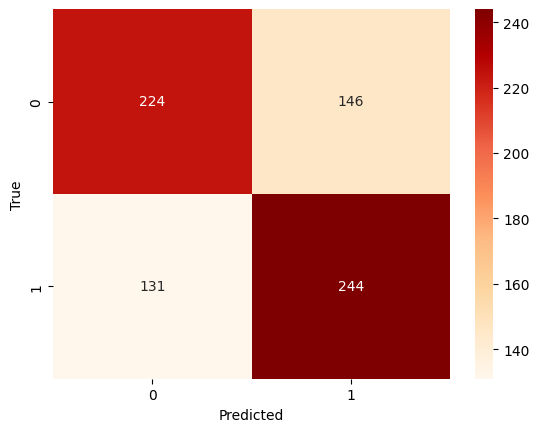

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="OrRd")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34,random_state=25)
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print("The accuracy is :",metrics.accuracy_score(y_test,y_pred))

The accuracy is : 0.5429417571569596


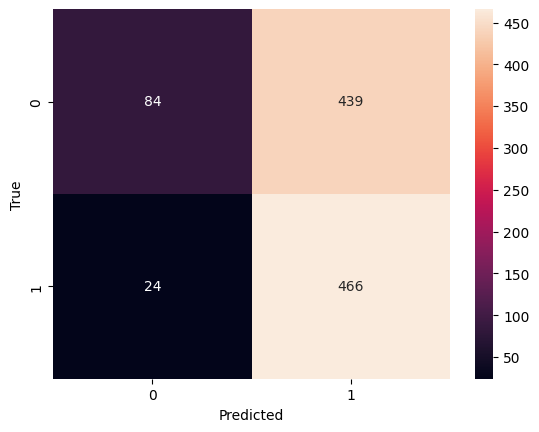

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=25)
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6728187919463087


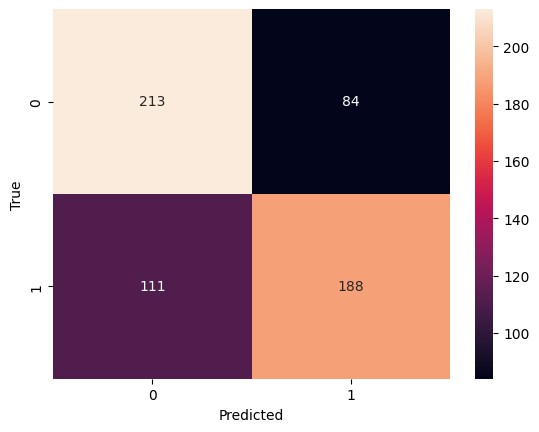

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**LOGISTIC CLASSIFICATION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=25)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6526845637583892


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


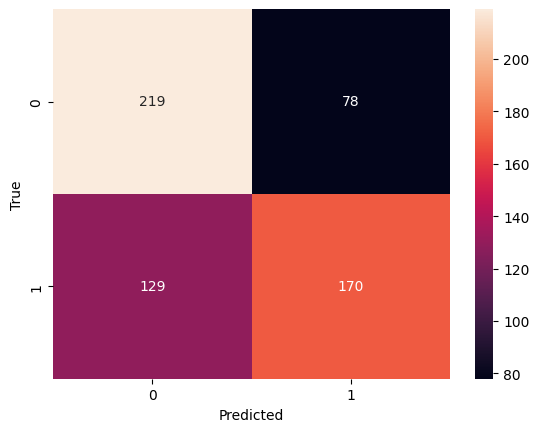

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=25)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7355704697986577


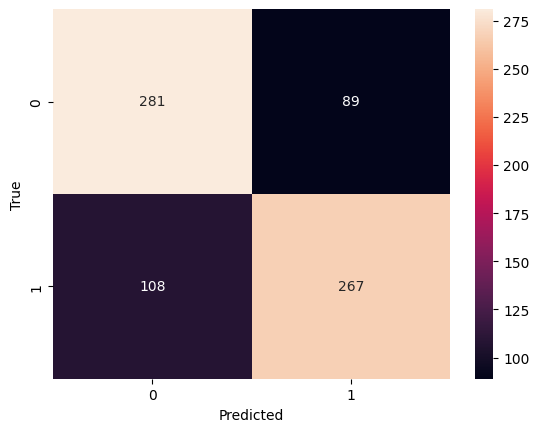

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**XG BOOST**

In [ ]:
import xgboost as xgb
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=25)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.6862416107382551


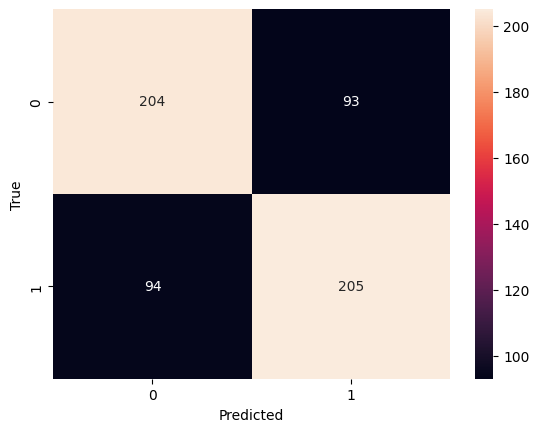

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))
y_pred_proba = model.predict(x_test)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/200
75/75 [==============================] - 6s 6ms/step - loss: 10.1657 - accuracy: 0.5220 - val_loss: 1.8715 - val_accuracy: 0.5369
Epoch 2/200
75/75 [==============================] - 0s 4ms/step - loss: 1.7173 - accuracy: 0.5275 - val_loss: 1.6301 - val_accuracy: 0.5319
Epoch 3/200
75/75 [==============================] - 0s 5ms/step - loss: 1.2762 - accuracy: 0.5439 - val_loss: 1.1885 - val_accuracy: 0.5721
Epoch 4/200
75/75 [==============================] - 0s 4ms/step - loss: 1.1900 - accuracy: 0.5661 - val_loss: 1.0578 - val_accuracy: 0.6023
Epoch 5/200
75/75 [==============================] - 0s 4ms/step - loss: 1.0105 - accuracy: 0.5754 - val_loss: 1.2142 - val_accuracy: 0.5000
Epoch 6/200
75/75 [==============================] - 0s 4ms/step - loss: 1.1509 - accuracy: 0.5691 - val_loss: 1.1406 - val_accuracy: 0.4899
Epoch 7/200
75/75 [==============================] - 0s 5ms/step - loss: 0.8989 - accuracy: 0.5813 - val_loss: 1.0341 - val_accuracy: 0.5050
Epoch 8/200


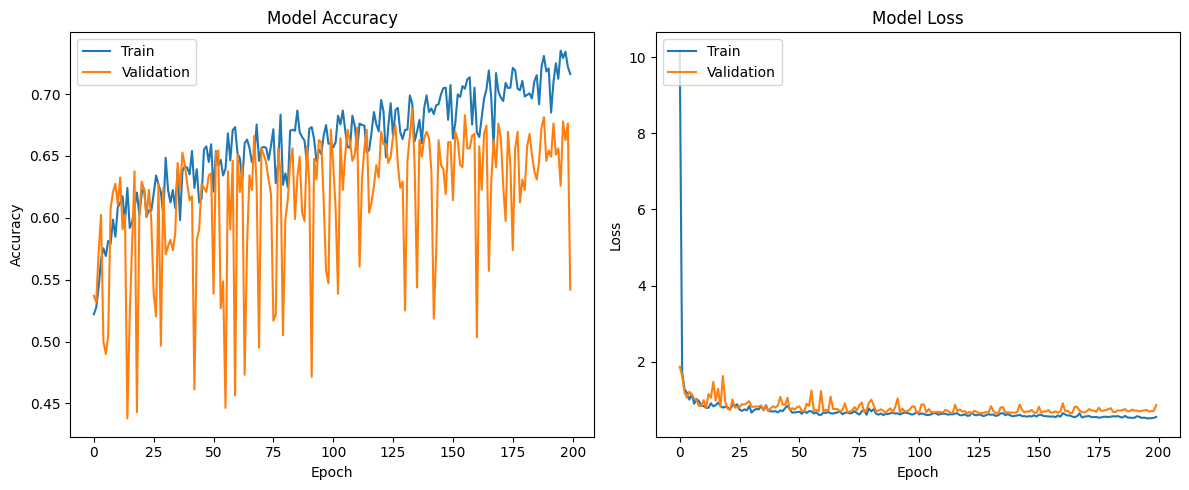

In [ ]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72       336
           1       0.00      0.00      0.00       260

    accuracy                           0.56       596
   macro avg       0.28      0.50      0.36       596
weighted avg       0.32      0.56      0.41       596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
